<a href="https://colab.research.google.com/github/pranao0609/DL_Projects/blob/main/6_Visualize_Maps_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

100%|██████████| 170M/170M [00:02<00:00, 82.5MB/s]


In [ ]:
class FeatureCNN(nn.Module):
    def __init__(self):
        super(FeatureCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(32 * 8 * 8, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        return self.fc(x)

model = FeatureCNN()
model.eval()

FeatureCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

In [ ]:
image, label = next(iter(test_loader))

In [ ]:
with torch.no_grad():
    feature_maps = F.relu(model.conv1(image))

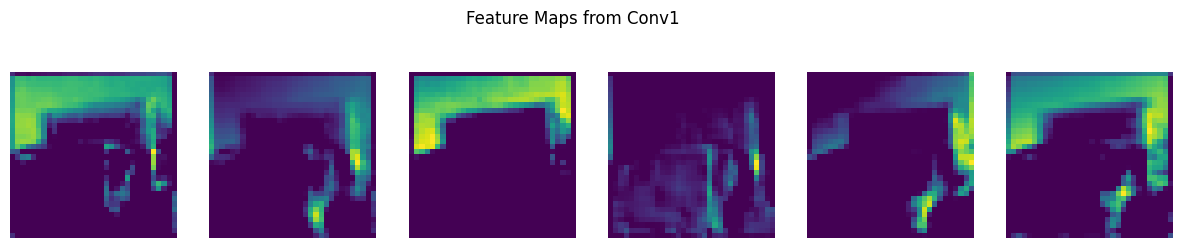

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(15, 3))
for i in range(6):
    axes[i].imshow(feature_maps[0, i].cpu(), cmap='viridis')
    axes[i].axis('off')
plt.suptitle("Feature Maps from Conv1")
plt.show()